# Environment

In [54]:
import gc
import os
import sys
import importlib
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

sys.path.insert(0, "/home/michal.kubacki/Githubs/Re-MEND/code/External_Datasets/GeneSet_Derivation/Herring_celloracle/helpers")

import config
importlib.reload(config)
from config import *
n_cpus = 32

In [ ]:
reference = "hg19"

neurons_set = "all_inhibitory_all_ages"
# neurons_set = "all_inhibitory"

cells_dict = {
    "all_inhibitory"            :   ['SST', 'VIP', 'MGE_dev'],
    "all_inhibitory_all_ages"   :   ['VIP', 'SST', 'PV', 'MGE_dev']
}

ages_dict = {
    "all_inhibitory"            :   ['1m','3m','6m','10m','1y','2y','4y','ga22','ga24'],
    "all_inhibitory_all_ages"   :   ['1m','3m','6m','10m','1y','2y','4y','6y','10y','16y','20y','40y','ga22','ga24']
}

output_dir, input_dir, root_dir, tmp_dir, in_dir_from_scenic = set_custom_folders(reference, neurons_set)

sel_celltypes  = cells_dict[neurons_set]
sel_ages = ages_dict[neurons_set]

In [56]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

# Load data

In [57]:
adata = sc.read_h5ad(os.path.join(input_dir, 'Processed_data_RNA-all_full-counts-and-downsampled-CPM.h5ad'))
adata_metadata = pd.read_csv(os.path.join(in_dir_from_scenic, 'cells_data.csv'), sep=",", index_col = 0)

In [58]:
adata_metadata.head()

,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,...,predictedCell,predictedGroup,predictedScore,FRIP,ReadsInPeaks,age,chem,major_clust,age_mapped,old_index
GGCACGTGTAGCGGTA-1-ga24,4.066,959.0,5226.0,544.0,0.067890,1.0,1.290194,3958.0,16806.0,38489.0,...,TACCCACAGTAGGTTA-RL2107_ga24_v3,MGE_dev-1,0.286884,0.362892,27267.0,ga24,v3,MGE_dev,ga24,GGCACGTGTAGCGGTA-1
ATTACCTTCCACACCT-1-ga22,3.276,579.0,3435.0,453.0,0.047257,1.0,1.185054,4027.0,16633.0,36344.0,...,CTTTCAACAATAGTGA-RL2103_ga22_v3,MGE_dev-1,0.350839,0.338414,23823.0,ga22,v3,MGE_dev,ga22,ATTACCTTCCACACCT-1
CATAACGAGGCTAAAT-1-1m,4.760,1000.0,5140.0,512.0,0.071656,1.0,1.226595,3779.0,16108.0,35866.0,...,TTTCAGTTCTGGAGAG-RL1777_2d_v3,SST_CALB1_dev,0.275660,0.381753,26654.0,2d,v3,SST,1m,CATAACGAGGCTAAAT-1
TTAACGGGTCAGGTGA-1-10y,5.891,958.0,4650.0,407.0,0.068544,1.0,1.406015,4543.0,14098.0,33920.0,...,ATGCATGGTGGTCCGT-RL2126_10yr_v3,SST_ADGRG6,0.358058,0.394812,26165.0,10yr,v3,SST,10y,TTAACGGGTCAGGTGA-1
TGGGTTACAACTCGAT-1-6m,3.716,623.0,3497.0,394.0,0.051817,1.0,0.782756,3288.0,18928.0,33744.0,...,TCGGATAGTGTCTAAC-RL2108_179d_v3,PV_SULF1,0.214542,0.329943,21769.0,179d,v3,PV,6m,TGGGTTACAACTCGAT-1


In [59]:
print(f"adata_metadata.age: {adata_metadata.age[:5]}")
print(f"adata_metadata.age_mapped: {adata_metadata.age_mapped[:5]}")

adata_metadata.age: GGCACGTGTAGCGGTA-1-ga24    ga24
ATTACCTTCCACACCT-1-ga22    ga22
CATAACGAGGCTAAAT-1-1m        2d
TTAACGGGTCAGGTGA-1-10y     10yr
TGGGTTACAACTCGAT-1-6m      179d
Name: age, dtype: object
adata_metadata.age_mapped: GGCACGTGTAGCGGTA-1-ga24    ga24
ATTACCTTCCACACCT-1-ga22    ga22
CATAACGAGGCTAAAT-1-1m        1m
TTAACGGGTCAGGTGA-1-10y      10y
TGGGTTACAACTCGAT-1-6m        6m
Name: age_mapped, dtype: object


In [60]:
print(adata.obs.age.head())

AAACCTGAGAGTCGGT-RL1612_34d_v2    34d
AAACCTGAGCCGCCTA-RL1612_34d_v2    34d
AAACCTGAGTCGAGTG-RL1612_34d_v2    34d
AAACCTGAGTGAACAT-RL1612_34d_v2    34d
AAACCTGCAAGGACTG-RL1612_34d_v2    34d
Name: age, dtype: category
Categories (24, object): ['2d', '2yr', '3yr', '4yr', ..., '627d', 'ga22', 'ga24', 'ga34']


In [61]:
age_mapping = dict(zip(adata_metadata.age, adata_metadata.age_mapped))

# Apply the mapping to adata.obs.age
adata.obs['age_mapped'] = adata.obs.age.map(age_mapping)

# If there are any values in adata.obs.age that don't have a mapping,
# they will become NaN. To keep the original values for these cases, use:
adata.obs['age_mapped'] = adata.obs.age.map(age_mapping).fillna(adata.obs.age)

# Display the first few rows to verify the mapping
print(adata.obs[['age', 'age_mapped']].head())

# how many values were mapped vs. unmapped:
mapped_count = adata.obs.age_mapped.notna().sum()
total_count = len(adata.obs.age)
print(f"Mapped {mapped_count} out of {total_count} values")
print(f"Mapping rate: {mapped_count/total_count:.2%}")

                                age age_mapped
AAACCTGAGAGTCGGT-RL1612_34d_v2  34d        34d
AAACCTGAGCCGCCTA-RL1612_34d_v2  34d        34d
AAACCTGAGTCGAGTG-RL1612_34d_v2  34d        34d
AAACCTGAGTGAACAT-RL1612_34d_v2  34d        34d
AAACCTGCAAGGACTG-RL1612_34d_v2  34d        34d
Mapped 154748 out of 154748 values
Mapping rate: 100.00%


In [62]:
adata.obs.age_mapped.unique()

array(['34d', '2y', '8yr', '1m', '3m', '16y', 'ga22', '6y', 'ga24', '6m',
       '4y', '10y', '10m', '20y', '40y', '1y', '14y', '25y'], dtype=object)

In [63]:
print(adata.shape)
adata = adata[adata.obs['chem']=='v3']
print(adata.shape)

(154748, 26747)


(141385, 26747)


In [64]:
# sel_celltypes = adata[adata.obs.cell_type == "IN", :].obs.major_clust.unique()
# sel_celltypes

In [65]:
adata = adata[adata.obs.age_mapped.isin(sel_ages)]
print(adata.shape)

(126822, 26747)


In [66]:
adata = adata[adata.obs['major_clust'].isin(sel_celltypes)]
print(adata.shape)

(15490, 26747)


In [ ]:
adata.obs.age.unique()

In [67]:
for cell in adata.obs['major_clust'].unique():
    print(f"{cell}: {(adata.obs['major_clust']==cell).sum()}")

PV: 2847
SST: 5714
MGE_dev: 1589
VIP: 5340


# Filter data

/home/michal.kubacki/.conda/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


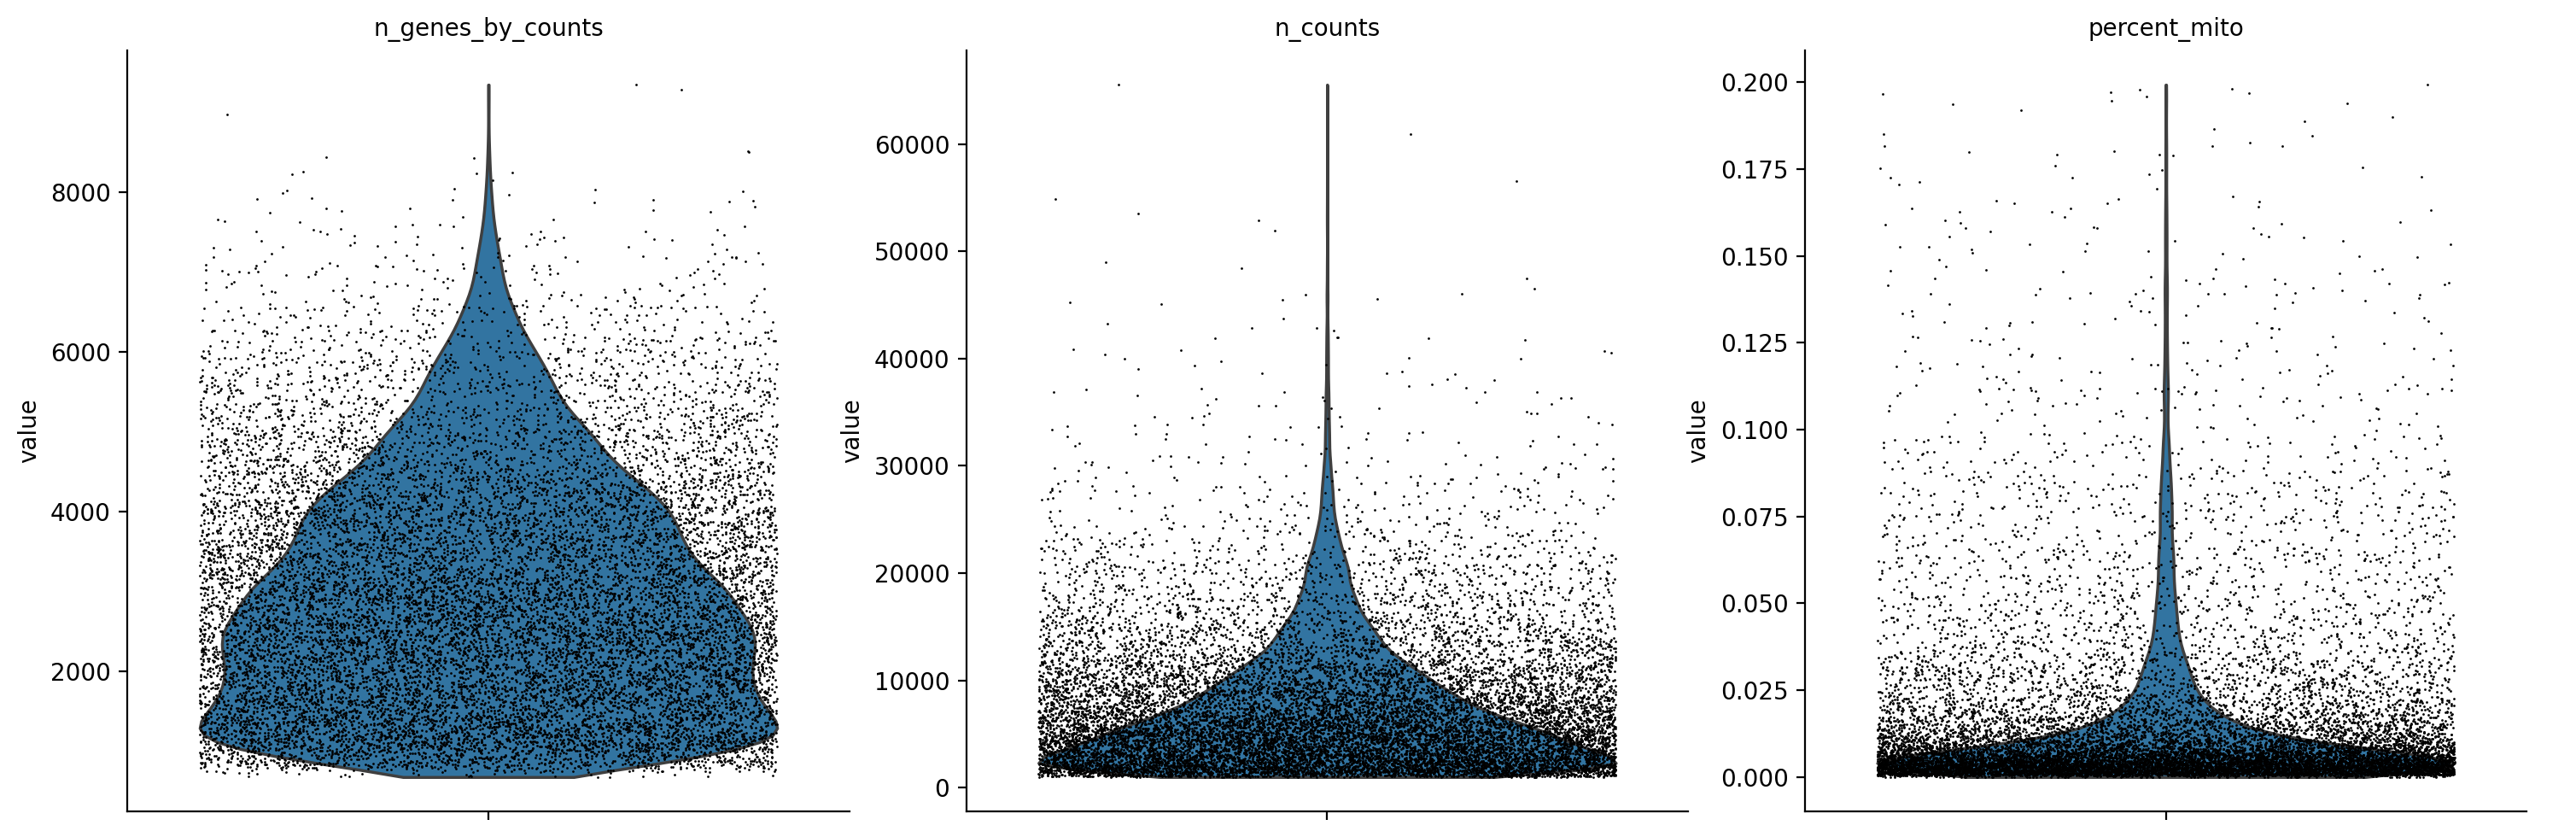

In [68]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "n_counts", "percent_mito"],
    jitter=0.4,
    multi_panel=True,
)

In [69]:
print(f"Number of cells before filtering: {adata.n_obs}")

cell_type_to_exclude = 'none'

# percentiles for filtering criteria
min_genes_percentile = 2
max_genes_percentile = 98
min_counts_percentile = 2
max_counts_percentile = 98
max_mito_percent = 30

min_genes = np.percentile(adata.obs['n_genes_by_counts'], min_genes_percentile)
max_genes = np.percentile(adata.obs['n_genes_by_counts'], max_genes_percentile)
min_counts = np.percentile(adata.obs['n_counts'], min_counts_percentile)
max_counts = np.percentile(adata.obs['n_counts'], max_counts_percentile)
max_mito = np.percentile(adata.obs['percent_mito'], max_mito_percent)

mask = (adata.obs['n_genes_by_counts'] >= min_genes) & (adata.obs['n_genes_by_counts'] <= max_genes) & \
        (adata.obs['n_counts'] >= min_counts) & (adata.obs['n_counts'] <= max_counts) & \
        (adata.obs['percent_mito'] <= max_mito) | (adata.obs.major_clust==cell_type_to_exclude)

adata = adata[mask, :]

print(f"Number of cells after filtering: {adata.n_obs}")

Number of cells before filtering: 15490
Number of cells after filtering: 4422


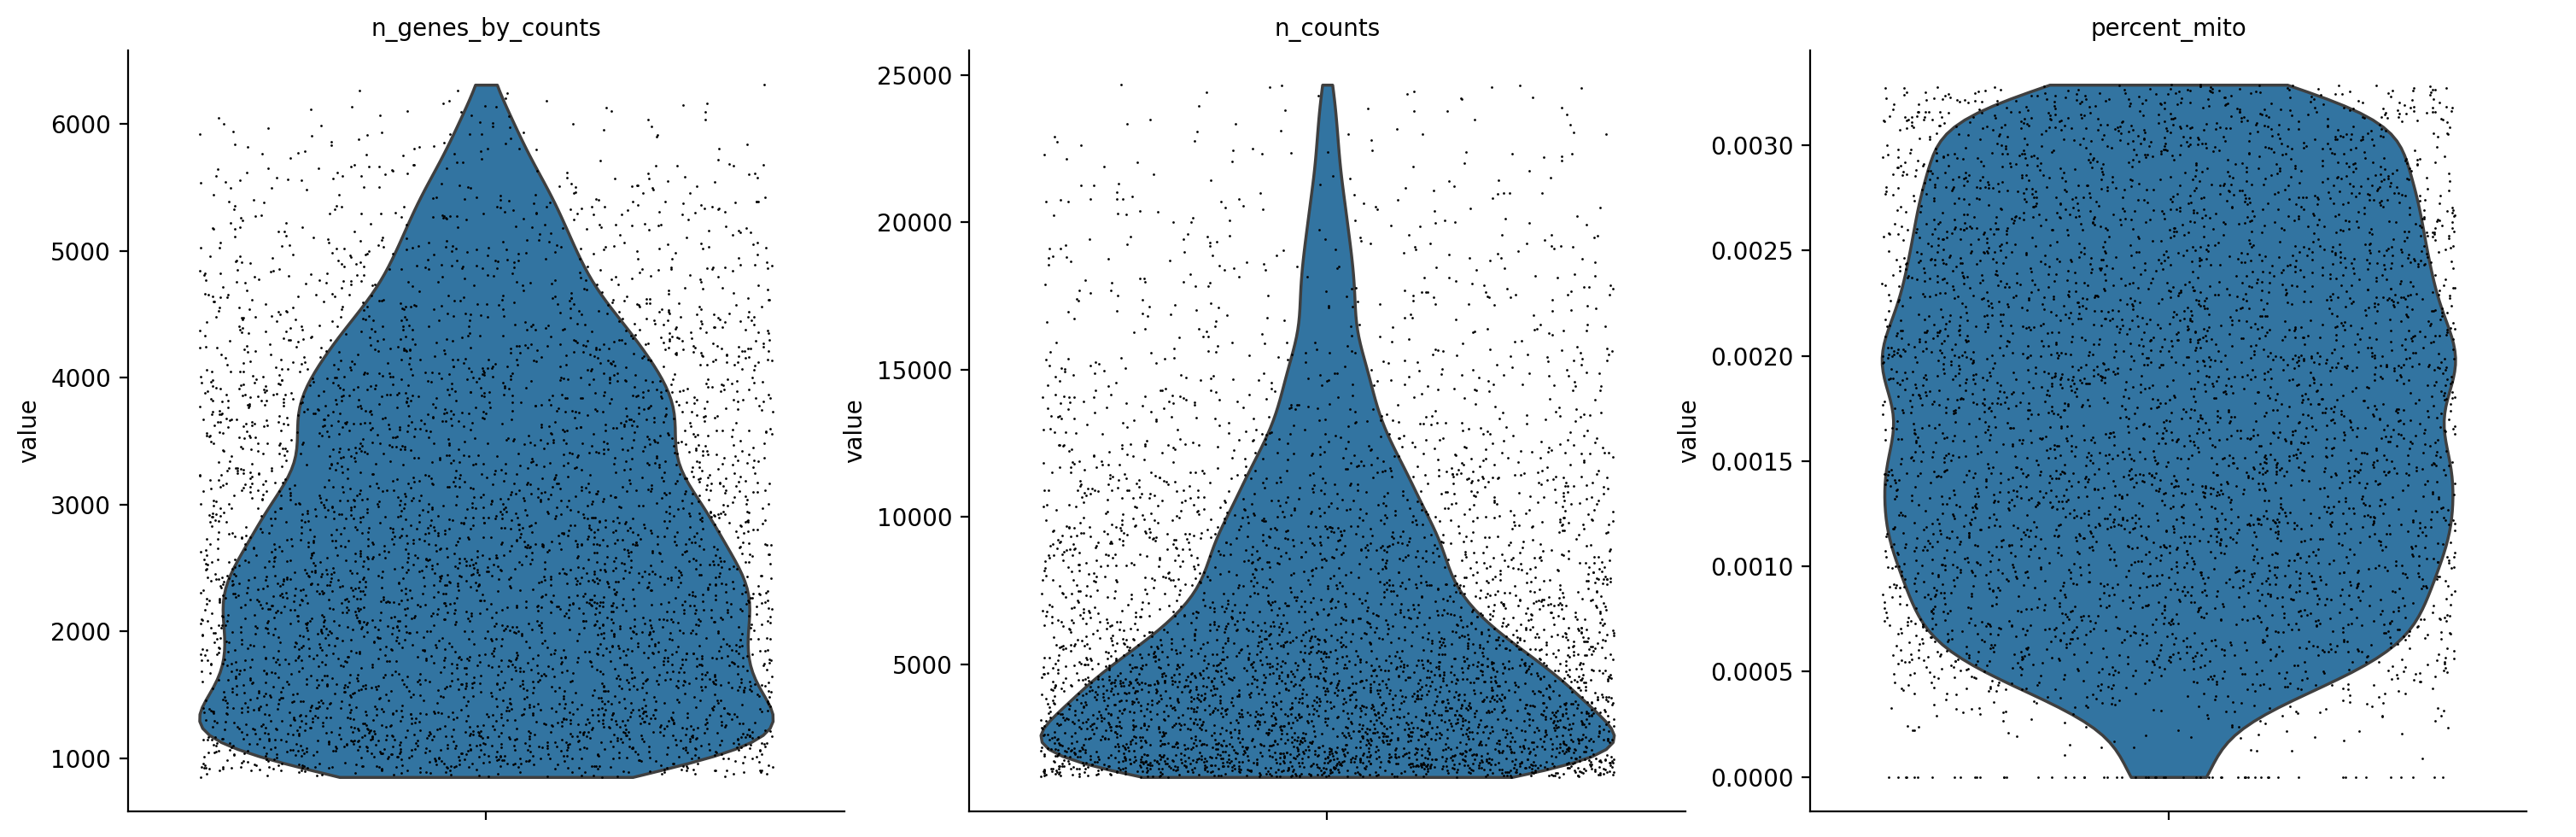

In [70]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "n_counts", "percent_mito"],
    jitter=0.4,
    multi_panel=True,
)

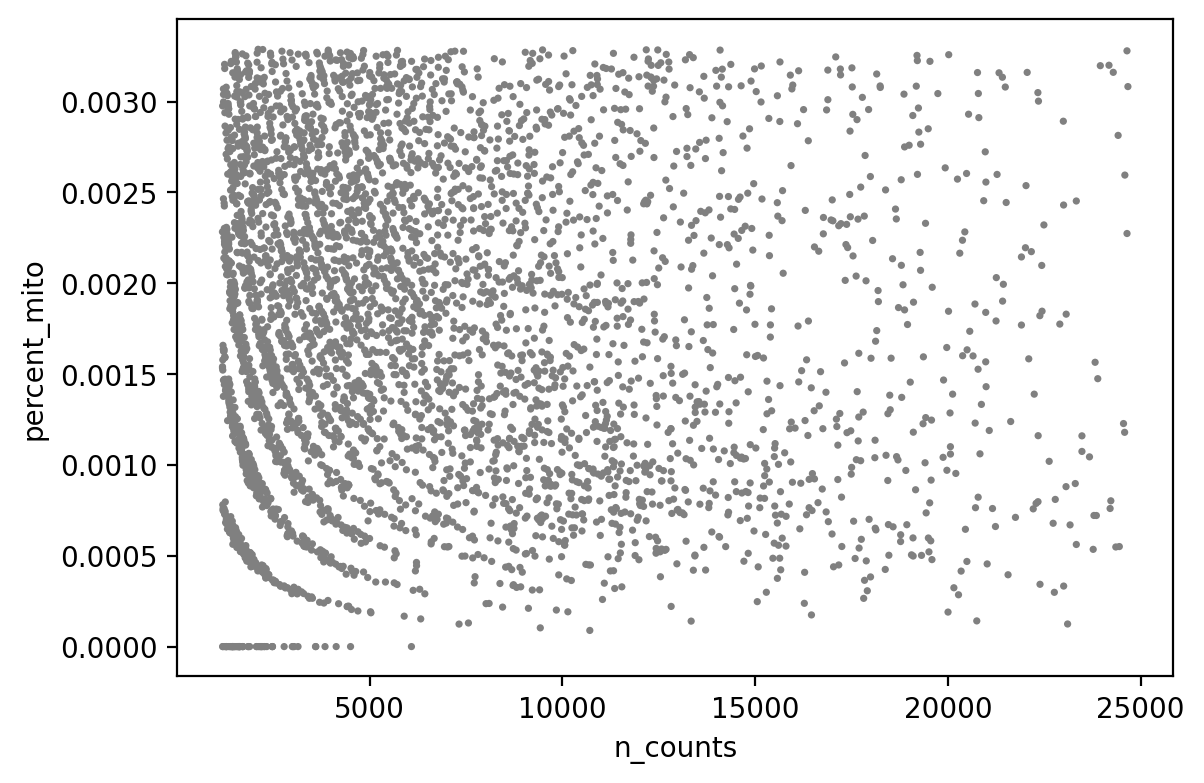

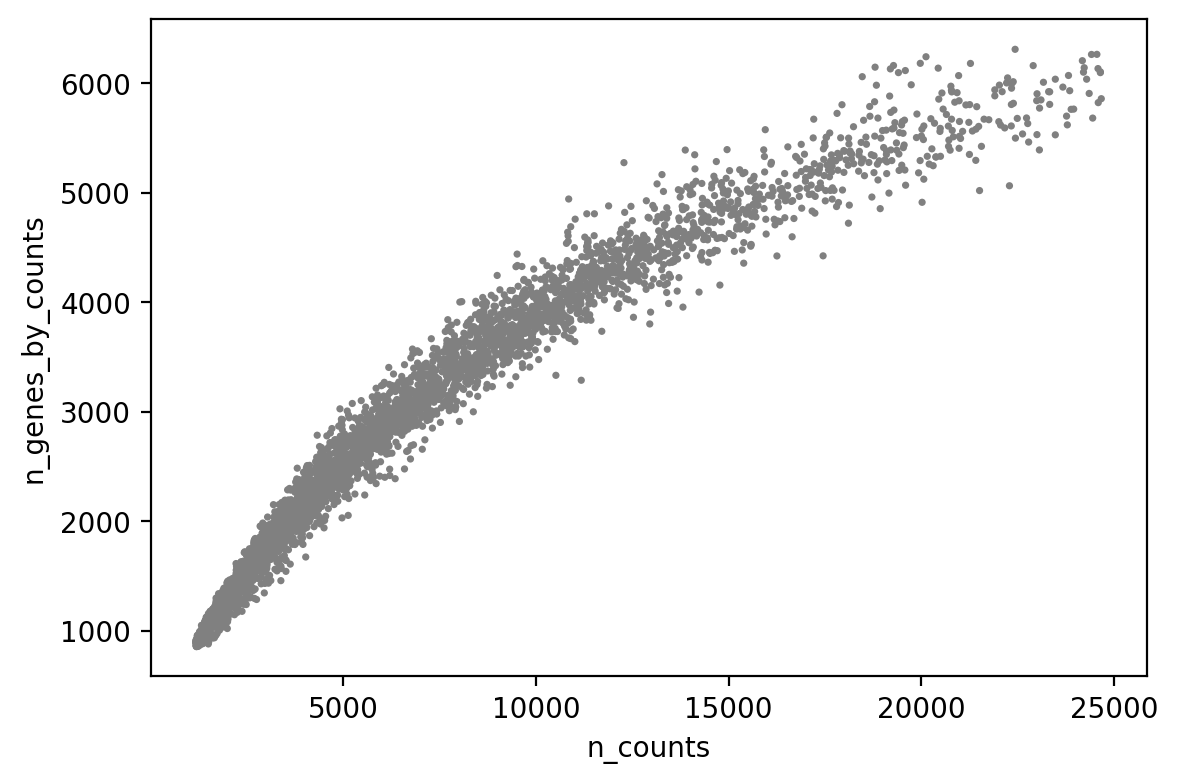

In [71]:
sc.pl.scatter(adata, x="n_counts", y="percent_mito")
sc.pl.scatter(adata, x="n_counts", y="n_genes_by_counts")

In [72]:
gc.collect()

11601

## Downsample data

In [73]:
adata.shape

(4422, 26747)

In [74]:
print([f"{celltype}: {len(adata.obs.major_clust[adata.obs.major_clust==celltype])}" for celltype in adata.obs.major_clust.unique()])

['MGE_dev: 1068', 'VIP: 1303', 'PV: 672', 'SST: 1379']


In [75]:
n_cells_downsample = 30000
if adata.shape[0] > n_cells_downsample:
    sc.pp.subsample(adata, n_obs=n_cells_downsample, random_state=123)

In [76]:
print([f"{celltype}: {len(adata.obs.major_clust[adata.obs.major_clust==celltype])}" for celltype in adata.obs.major_clust.unique()])

['MGE_dev: 1068', 'VIP: 1303', 'PV: 672', 'SST: 1379']


In [77]:
types = list(adata.obs.major_clust.unique())
types

['MGE_dev', 'VIP', 'PV', 'SST']

# Normalize data

In [78]:
adata.raw = adata

In [79]:
adata.layers['counts'] = adata.X.copy()
sc.pp.filter_genes(adata, min_cells = 1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

print(adata.layers['counts'][:20, :20])
print(adata.X.data[:10])
print(adata.layers['ds_norm_cts'].data[:10])

  (1, 17)	1.0
  (1, 6)	1.0
  (4, 15)	1.0
  (4, 10)	1.0
  (5, 16)	1.0
  (9, 10)	1.0
  (9, 4)	1.0
  (10, 16)	1.0
  (10, 6)	3.0
  (10, 4)	1.0
  (11, 6)	1.0
  (12, 17)	1.0
  (13, 10)	1.0
  (15, 16)	2.0
  (15, 3)	2.0
  (17, 16)	2.0
  (18, 6)	1.0
[1.0210907 1.0210907 1.515664  1.0210907 1.515664  1.0210907 1.515664
 1.0210907 1.0210907 1.0210907]
[6.90875478 6.90875478 6.90875478 7.60140233 6.90875478 6.90875478
 6.90875478 6.90875478 7.60140233 6.90875478]


In [80]:
gc.collect()

8736

In [81]:
sc.pp.highly_variable_genes(adata, inplace = True, n_top_genes=3000) #subset = True
adata

AnnData object with n_obs × n_vars = 4422 × 25854
    obs: 'batch', 'RL#', 'age', 'chem', 'concat_id', 'numerical_age', 'stage_id', 'Sex', 'Race', 'PMI', 'Brain Regions*', 'Cause of Death', 'ICD-10 Code', 'ICD-10 category', 'Oxygen/No Oxygen', 'Date-of-Collection', 'Collection_year', 'Library Prep Date', 'Library Prep Lot', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'doublet_score', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'mat/dev', 'cell_type', 'major_clust', 'sub_clust', 'combined-leiden', 'Astro_GFAP_dev-traj', 'Astro_SLC1A2_dev-traj', 'L2_CUX2_LAMP5_dev-traj', 'L3_CUX2_PRSS12_dev-traj', 'L4_RORB_LRRK1_dev-traj', 'L4_RORB_MET_dev-traj', 'L4_RORB_MME_dev-traj', 'L5-6_THEMIS_CNR1_dev-traj', 'L5-6_THEMIS_NTNG2_dev-traj', 'L5-6_TLE4_HTR2C_dev-traj', 'L5-6_TLE4_SCUBE1_dev-traj', 'L5-6_TLE4_SORCS1_dev-traj', 'Micro_dev-traj', 'OPC_dev-traj', 'OPC_MBP_dev-traj', 'Oligo_dev-traj', 'Vas_CLDN5_de

In [82]:
np.sum(adata.var['highly_variable'])

3000

# Pseudobulk

In [83]:
# Group cells by major_clust and calculate mean expression values
counts_data = adata.layers["ds_norm_cts"].toarray()
pseudobulk_df = pd.DataFrame(counts_data, index=adata.obs.index, columns=adata.var_names)
pseudobulk_df["major_clust"] = adata.obs["major_clust"]
pseudobulk_df = pseudobulk_df.groupby("major_clust").mean()

# Create a new AnnData object for pseudobulk data
pseudobulk_adata = sc.AnnData(X=pseudobulk_df.values, obs=pd.DataFrame(index=pseudobulk_df.index), var=pd.DataFrame(index=pseudobulk_df.columns))

/home/michal.kubacki/.conda/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [84]:
pseudobulk_df.head()

,RP11-34P13.7,AL627309.1,RP11-34P13.14,AP006222.2,RP4-669L17.10,RP5-857K21.2,RP5-857K21.4,RP11-206L10.3,RP11-206L10.5,RP11-206L10.2,...,ZNF84-1,AL603926.1,AL592183.1,AC011841.1,AL354822.1,AL590523.1,PNRC2-1,SRSF10-1,AC145205.1,CU459201.1
major_clust,,,,,,,,,,,,,,,,,,,,,
VIP,0.00000,0.005302,0.00000,0.042418,0.180276,0.000000,0.137858,0.000000,0.00000,0.026512,...,0.000000,0.021209,0.709449,0.0,0.143160,0.0,0.0,0.053022,0.0,0.0
SST,0.03507,0.000000,0.01002,0.150299,0.165330,0.010020,0.140280,0.000000,0.00501,0.005010,...,0.000000,0.005010,0.757332,0.0,0.165329,0.0,0.0,0.045090,0.0,0.0
PV,0.00000,0.000000,0.00000,0.051404,0.102809,0.010281,0.155244,0.010281,0.00000,0.020562,...,0.010281,0.020562,0.715567,0.0,0.082249,0.0,0.0,0.030843,0.0,0.0
MGE_dev,0.00000,0.000000,0.00000,0.064689,0.058220,0.000000,0.207007,0.006469,0.00000,0.025877,...,0.000000,0.000000,0.756876,0.0,0.032993,0.0,0.0,0.038813,0.0,0.0


In [85]:
pseudobulk_adata

AnnData object with n_obs × n_vars = 4 × 25854

### scRNAseq - receptors expression

In [86]:
gois = ["AR", "THRB", "ESR2", "NR1H3", "NR1H2", "RARA", "RARG", "AHR", "NR3C1"]

In [87]:
gene_indexs = []
for goi in gois:
    try:
        index = np.where(adata.var_names == goi)[0][0]
        gene_indexs.append(index)
    except ValueError:
        print(f"{goi} index not found")
print(gene_indexs)

[10970, 4487, 18161, 14941, 24597, 21361, 16479, 9588, 7788]


#### Expression in metacells

In [88]:
for i, goi in enumerate(gois):
    expression_bulk = pseudobulk_adata.X[:,gene_indexs[i]]
    print([f"Expression of {goi} in {cell}: {expression}" for cell, expression in zip(pseudobulk_adata.obs_names, expression_bulk)])

['Expression of AR in VIP: 0.14316068921272074', 'Expression of AR in SST: 0.010019948918513735', 'Expression of AR in PV: 0.1562747273813472', 'Expression of AR in MGE_dev: 0.04528210061348928']
['Expression of THRB in VIP: 3.84176203567098', 'Expression of THRB in SST: 3.3606331712959863', 'Expression of THRB in PV: 2.272120085692533', 'Expression of THRB in MGE_dev: 2.6197721909549125']
['Expression of ESR2 in VIP: 0.1702032229439906', 'Expression of ESR2 in SST: 0.13577231769261172', 'Expression of ESR2 in PV: 0.17580725938237998', 'Expression of ESR2 in MGE_dev: 0.3781691623909602']
['Expression of NR1H3 in VIP: 0.09013801285471285', 'Expression of NR1H3 in SST: 0.13527003520148154', 'Expression of NR1H3 in PV: 0.11308973597093368', 'Expression of NR1H3 in MGE_dev: 0.06468871516212753']
['Expression of NR1H2 in VIP: 0.1855766824835247', 'Expression of NR1H2 in SST: 0.07013964242959615', 'Expression of NR1H2 in PV: 0.06168531052960018', 'Expression of NR1H2 in MGE_dev: 0.1681915952

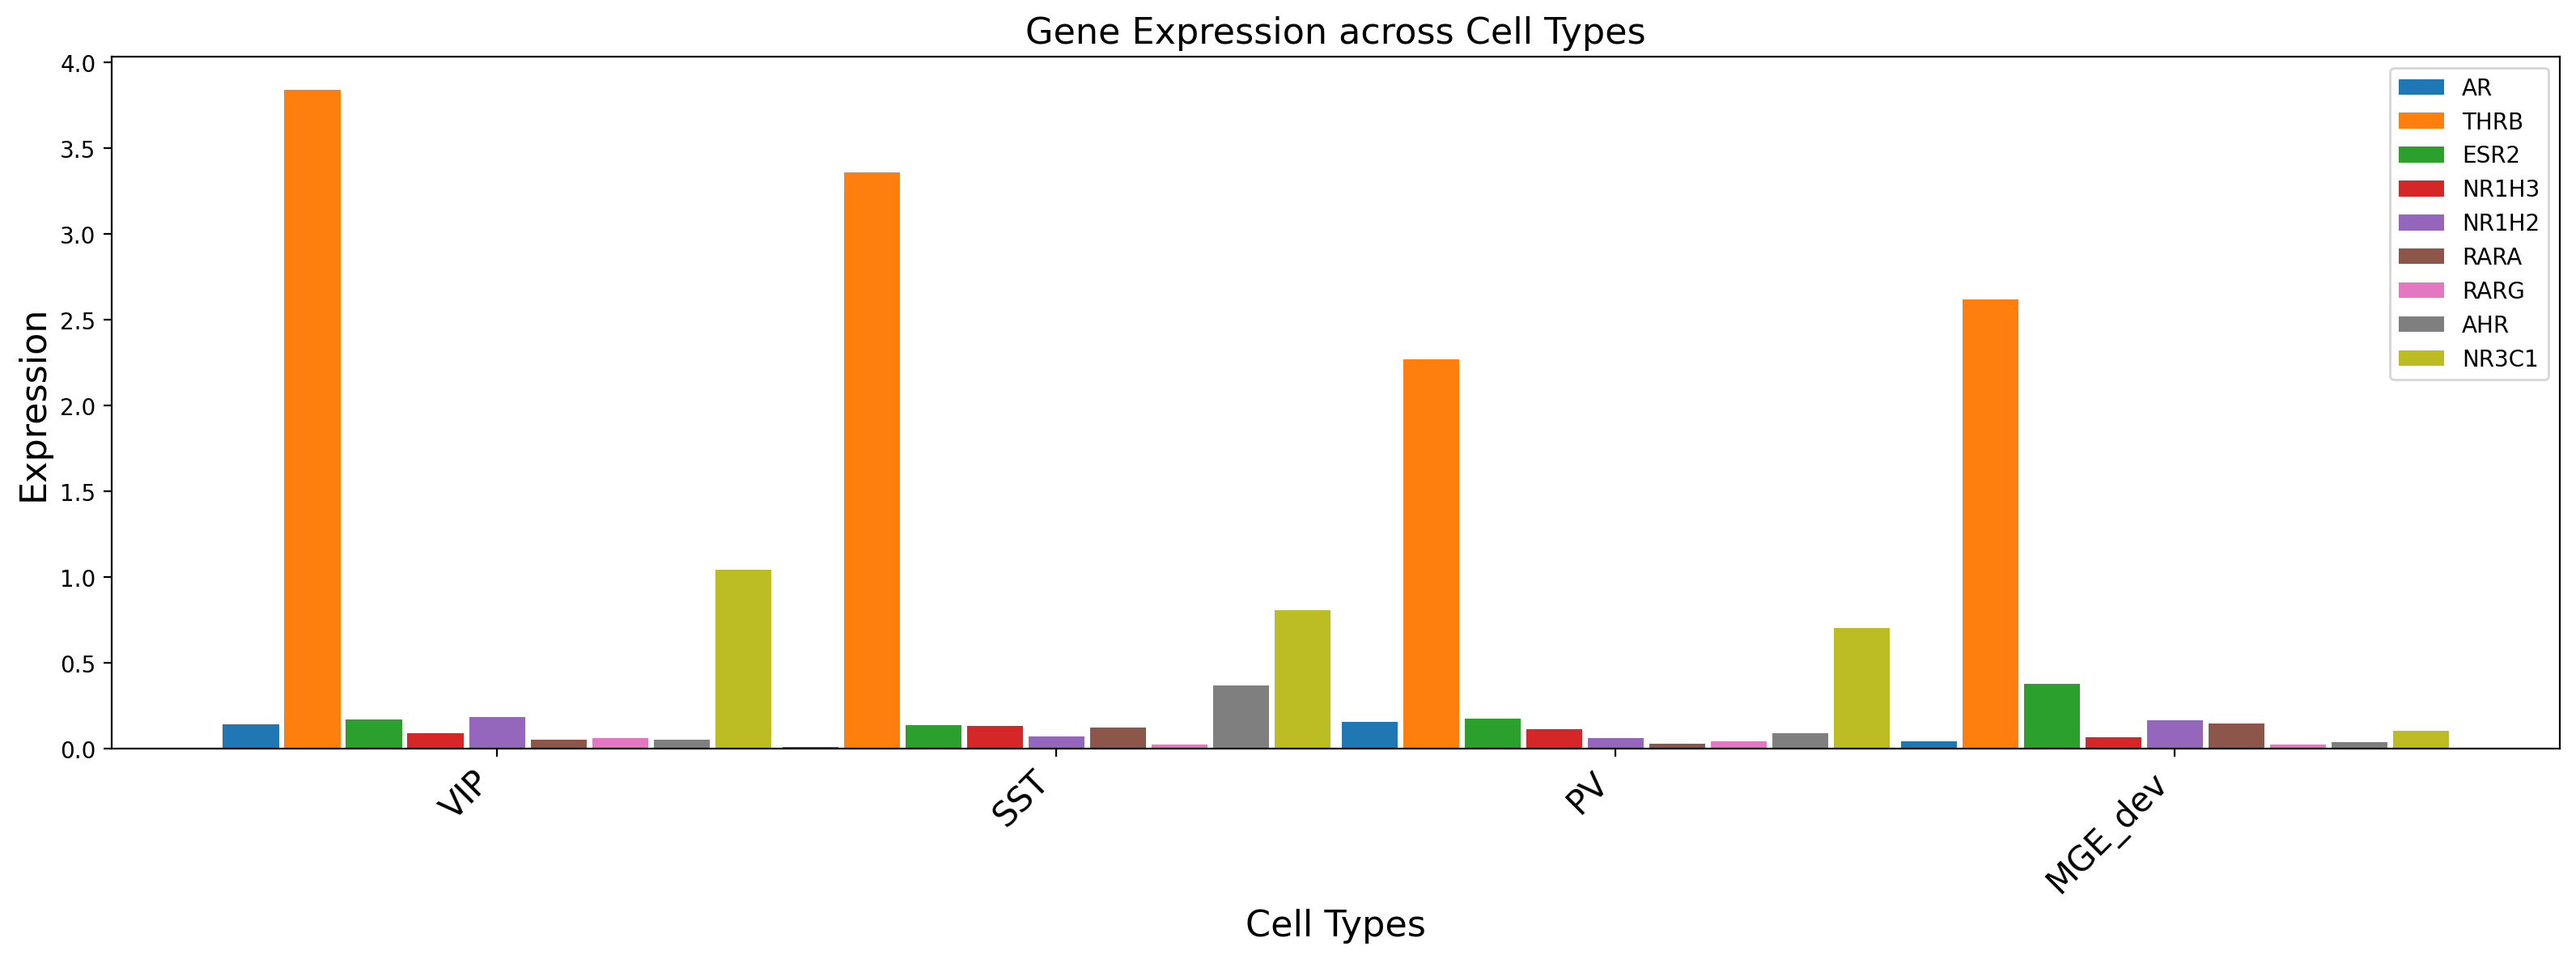

In [89]:
expression_data = [pseudobulk_adata.X[:,gene_indexs[i]] for i in range(0,len(gois))]
cell_types = pseudobulk_adata.obs_names

bar_width = 0.1
spacing = 0.01
fig, ax = plt.subplots(figsize=(16, 6))

x = np.arange(len(cell_types))
ax.set_xticks(x)
ax.set_xticklabels(cell_types, rotation=45, ha='right', fontsize=15)

for i, goi in enumerate(gois):
    offset = (i - (len(gois) - 1) / 2) * (bar_width + spacing)
    ax.bar(x + offset, expression_data[i], width=bar_width, label=goi)

ax.set_xlabel('Cell Types', fontsize=16)
ax.set_ylabel('Expression', fontsize=16)
ax.set_title('Gene Expression across Cell Types', fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()

In [90]:
summed_counts = np.sum(counts_data, axis=0)
print(summed_counts.shape)
print(summed_counts)

(25854,)
[ 48.36128346   6.90875478  13.81750956 ... 193.44513382   0.
   0.        ]


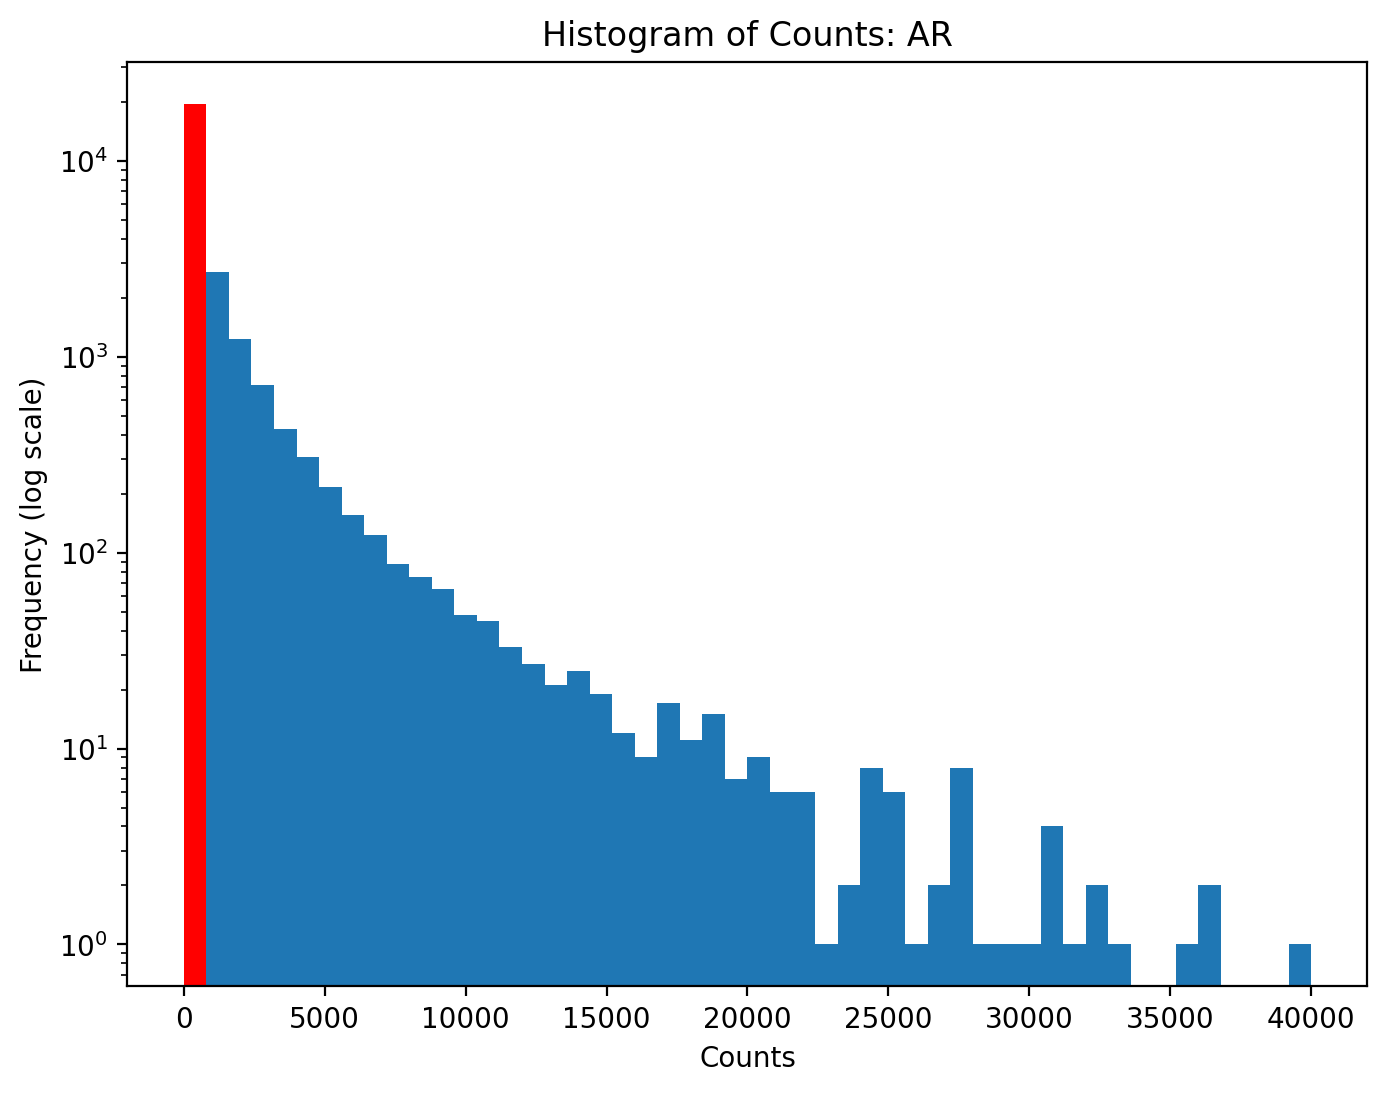

AR count: 353.73378785827765


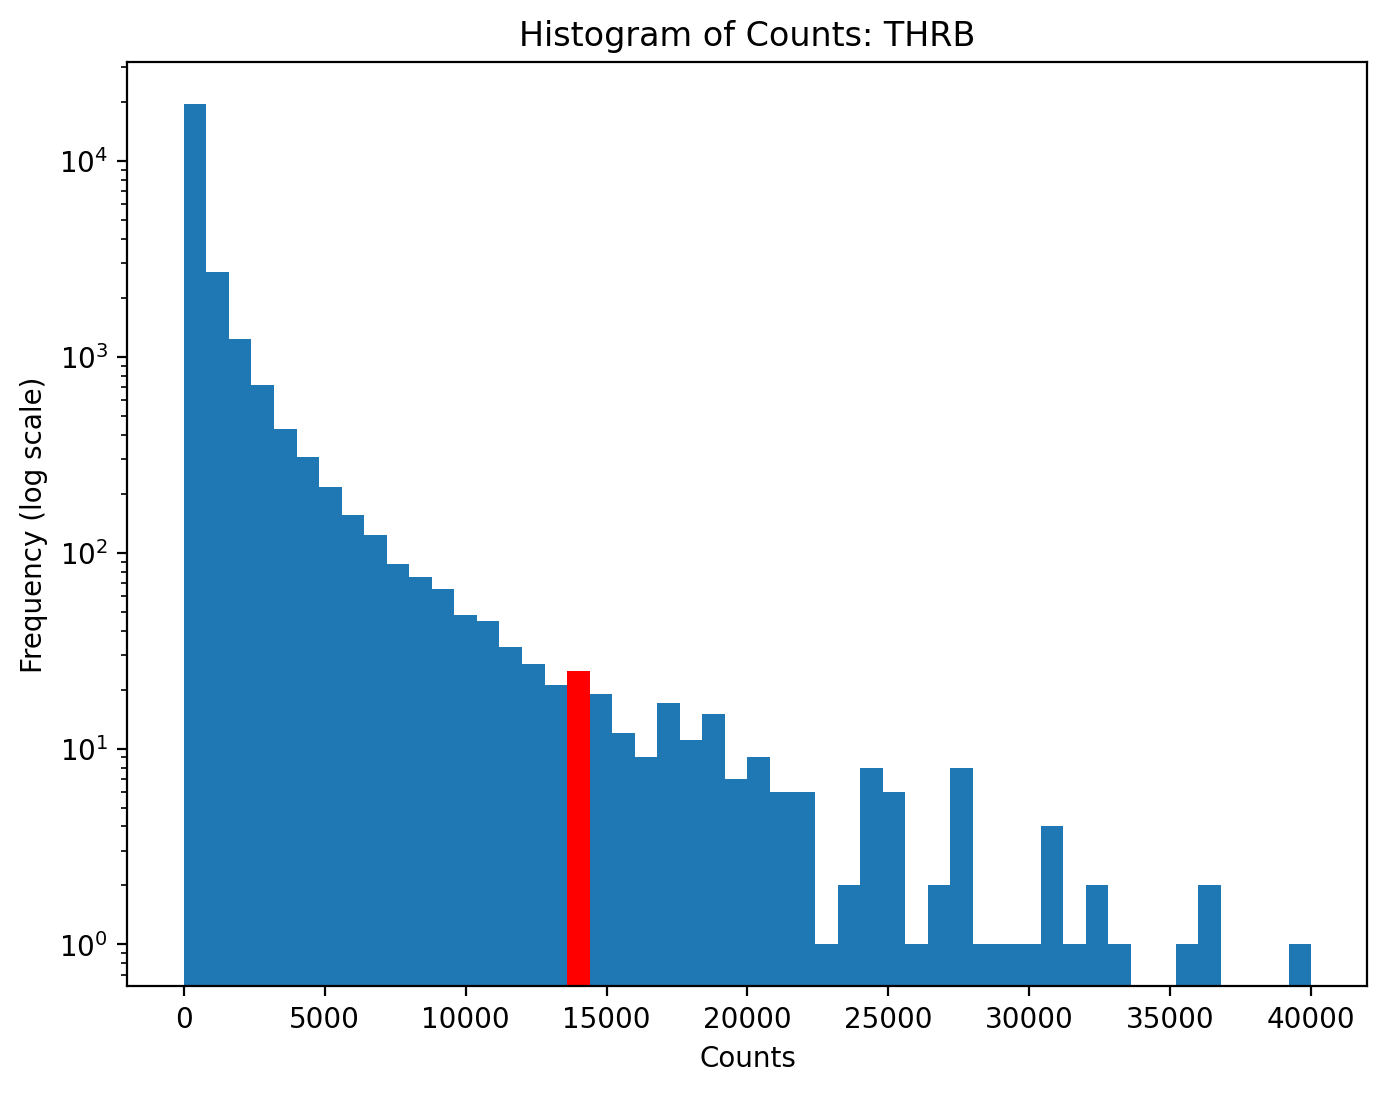

THRB count: 13964.910473221475


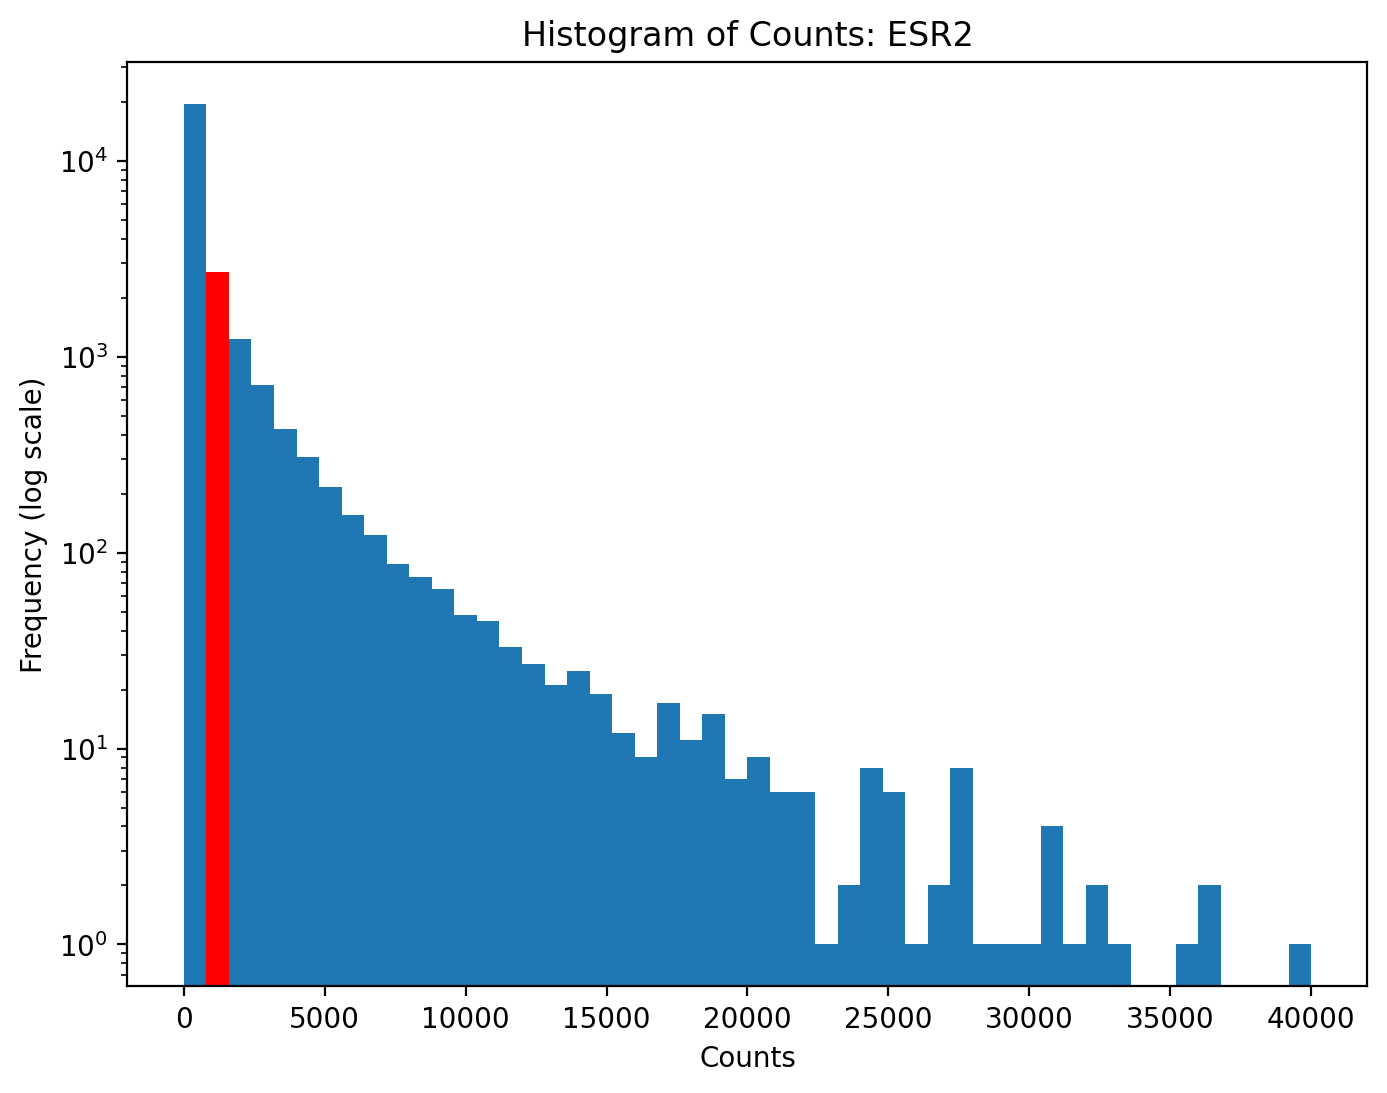

ESR2 count: 931.0319693326385


In [91]:
for i, gene_index in enumerate(gene_indexs[:3]):
    count = summed_counts[gene_index]
                               
    plt.figure(figsize=(8, 6))
    n, bins, patches = plt.hist(summed_counts, bins=50, log=True)
    
    # Find the bin index where the gene count falls into
    bin_index = np.where(bins <= count)[0][-1]
    patches[bin_index].set_facecolor('red')
    
    plt.xlabel("Counts")
    plt.ylabel("Frequency (log scale)")
    plt.title(f"Histogram of Counts: {gois[i]}")
    plt.show()
    print(f"{gois[i]} count: {count}")

In [92]:
adata.shape

(4422, 25854)

In [93]:
file_name = os.path.join(output_dir, f"subseted_rna_andata.h5ad")
adata.write(file_name)

In [94]:
output_dir

'/group/testa/michal.kubacki/herring/output_hg19_all_inhibitory_all_ages/celloracle'